In [1]:
from context import CL61_module as mCL61

In [2]:
import cmcrameri.cm as cmc

COLOR_MAP = cmc.batlow
BATLOW_7COLORS  = [{"name":"Fairy Tale","hex":"FBC5E6","rgb":[251,197,230],"cmyk":[0,22,8,2],"hsb":[323,22,98],"hsl":[323,87,88],"lab":[85,24,-9]},
                   {"name":"Olive","hex":"88842B","rgb":[136,132,43],"cmyk":[0,3,68,47],"hsb":[57,68,53],"hsl":[57,52,35],"lab":[54,-10,47]},
                   {"name":"Fern green","hex":"4C734B","rgb":[76,115,75],"cmyk":[34,0,35,55],"hsb":[119,35,45],"hsl":[119,21,37],"lab":[45,-22,18]},
                   {"name":"Penn Blue","hex":"03245C","rgb":[3,36,92],"cmyk":[97,61,0,64],"hsb":[218,97,36],"hsl":[218,94,19],"lab":[16,14,-37]},
                   {"name":"Butterscotch","hex":"D69444","rgb":[214,148,68],"cmyk":[0,31,68,16],"hsb":[33,68,84],"hsl":[33,64,55],"lab":[66,17,51]},
                   {"name":"Melon","hex":"FCAC99","rgb":[252,172,153],"cmyk":[0,32,39,1],"hsb":[12,39,99],"hsl":[12,94,79],"lab":[78,27,22]},
                   {"name":"Midnight green","hex":"115362","rgb":[17,83,98],"cmyk":[83,15,0,62],"hsb":[191,83,38],"hsl":[191,70,23],"lab":[32,-14,-14]}]

COLOR_CODES_BLUE_YEL = ['#03245C', '#D69444']

# Get Dataset and process

In [3]:
februar = mCL61.CL61Processor(folder_path='../Data', specific_filename='temp_20230204.nc')
june = mCL61.CL61Processor(folder_path='../Data', specific_filename='temp_1d_test.nc')

Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.yml 


Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.yml 


In [4]:
februar.process.mask_noise()
june.process.mask_noise()

The results are stored under new variable: beta_att_clean, linear_depol_ratio_clean, noise mask and to_interpolate_mask
The results are stored under new variable: beta_att_clean, linear_depol_ratio_clean, noise mask and to_interpolate_mask


# Plot colormessh

In [11]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def filename_to_save(dataset,
                     save_name,
                     suffix='other',
                     output_folder='..\Outputs'):
    '''
    Finds the path and appropriate name for saving file based on period of interest of dataset
    '''
    if isinstance(save_name, str):
        return os.path.join(output_folder, save_name)
    else:
        # Determine the default filename based on the first datetime in the dataset
        default_filename = f"{dataset['time'].min().values.astype('datetime64[D]')}_{suffix}"
        return os.path.join(output_folder, default_filename)

def plot_cl61_as_colormesh(dataset, variable_names=['beta_att', 'linear_depol_ratio'],
                        min_value=1e-7,
                        max_value=1e-4,
                        range_limits=None,
                        color_map=cmc.batlow,
                        scales=['log', 'linear'],
                        time_var='time',
                        range_var='range',
                        save_fig = True,
                        **kwargs):
    """Plot CL61 data as a colormesh.

    Args:
        dataset (_type_): The dataset to be plotted.
        variable_names (list, optional): Names of the variables to be plotted.. Defaults to ['beta_att', 'linear_depol_ratio'].
        min_value (_type_, optional):Minimum value for the color scale.. Defaults to 1e-7.
        max_value (_type_, optional): Maximum value for the color scale.. Defaults to 1e-4.
        range_limits (bool, optional): [min_range, max_range] for the y-axis (optional upper limit).. Defaults to False.
        color_map (_type_, optional): Matplotlib colormap name. (Default see file).
        scales (list, optional): to specify the color scales. Defaults to ['log', 'linear'].
        time_var (str, optional): Name of the time variable. Defaults to 'time'.
        range_var (str, optional): Name of the range variable. Defaults to 'range'.
        save_fig (bool, optional): Set to True if you want to save the figure. Defaults to True.
    """
    x = dataset[time_var]
    h = np.round(dataset[range_var])
    back_att_arr = dataset[variable_names[0]].T
    depol_arr = dataset[variable_names[1]].T

    fig, [ax, ax2] = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

    lims = [np.max([np.nanmin(back_att_arr), min_value]), np.min([np.nanmax(back_att_arr), max_value])]

    if isinstance(range_limits, int):
        range_limits = [0, range_limits]
    elif isinstance(range_limits, list):
        if len(range_limits) == 1:
            range_limits = [0, range_limits[-1]]
        if len(range_limits) > 2:
            print('Did not expect range_limits length > 2 ; taking first 2 values')
            range_limits = range_limits[:2]
    else:
        range_limits = [0, 15000]
    
    print(range_limits)

    if scales[0] == 'log':
        cax = ax.pcolormesh(x, h, back_att_arr, axes=ax, shading='nearest', cmap=color_map,
                            norm=colors.LogNorm(vmin=lims[0], vmax=lims[1]))
    else:
        cax = ax.pcolormesh(x, h, back_att_arr, axes=ax, shading='nearest', cmap=color_map, vmin=0, vmax=1)
    cbar = fig.colorbar(cax)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel(rf'{variable_names[0]}', rotation=90)
    ax.set_ylabel('Range (m)')
    # ax.set_xlabel('time')
    ax.set_ylim(range_limits)

    if scales[1] == 'log':
        cax2 = ax2.pcolormesh(x, h, depol_arr, shading='nearest', cmap=color_map,
                              norm=colors.LogNorm(vmin=lims[0], vmax=lims[1]))
    else:
        cax2 = ax2.pcolormesh(x, h, depol_arr, shading='nearest', cmap=color_map, vmin=0, vmax=1)

    cbar = fig.colorbar(cax2)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel(rf'{variable_names[1]}', rotation=90)
    ax2.set_ylabel('Range (m)')
    ax2.set_xlabel('time')
    ax2.set_ylim(range_limits)

    if save_fig:
        filepath = filename_to_save(dataset, save_fig, suffix='colormesh')
        print(f'saved element to {filepath}')
        plt.savefig(filepath, bbox_inches='tight')
    
    plt.show()
    return

[0, 15000]
saved element to ..\Outputs\2023-02-03_colormesh


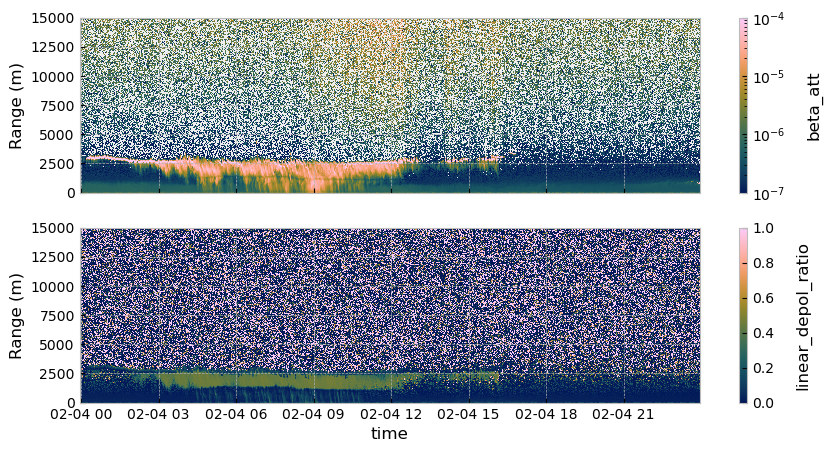

In [16]:
plot_cl61_as_colormesh(februar.dataset, variable_names=['beta_att', 'linear_depol_ratio'],
                        range_limits=None)

In [15]:
februar.plot.visualize_data(plot_type='colormesh',
                             varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'],
                             range_limits = None)

AttributeError: 'Plot' object has no attribute 'visualize_data'

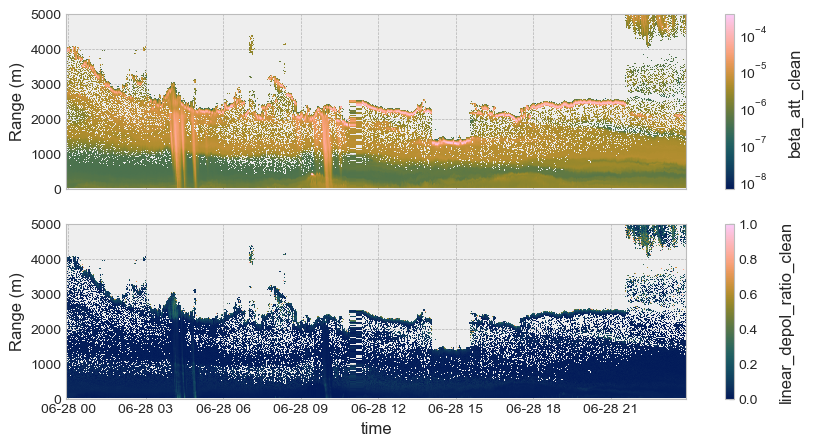

In [8]:
june.plot.visualize_data(plot_type='colormesh', varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'])

## Plot with datashader

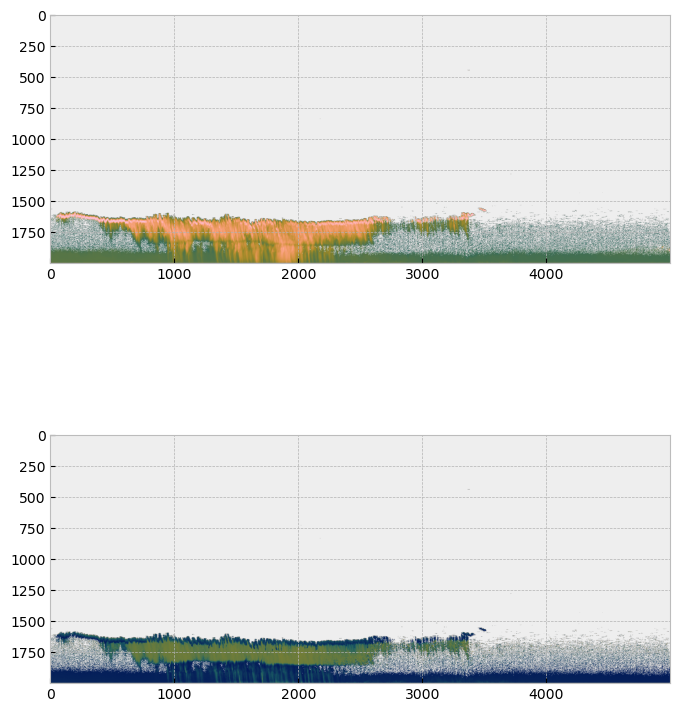

In [13]:
import datashader as ds
import datashader.transfer_functions as tf
import numpy as np

# Create a Datashader Canvas
cvs = ds.Canvas(plot_width=300, plot_height=100)

# Log-transform the data
log_back_att_arr = np.log10(februar.dataset['beta_att_clean'])

# Define the color map and normalization
color_map = COLOR_MAP
vmin = 1e-7
vmax = 1e-3
#color_mapper = ds.transfer_functions.dv.CMap(color_map)
log_back_att_arr.clip(min = vmin, max = vmax)

# Create the plot
img = tf.shade(log_back_att_arr.T, how='linear', cmap=cmc.batlow).to_pil().resize((5000, 2000))
img2 = tf.shade(februar.dataset['linear_depol_ratio_clean'].T, how='linear', cmap=cmc.batlow).to_pil().resize((5000, 2000))

# Display the plot using Matplotlib or another plotting library
#pil_img = tf.set_background(img, "white").to_pil().resize((5000, 2000))
fig, axs = plt.subplots(2,1,figsize=(8,10))
axs[0].imshow(img)
axs[1].imshow(img2)

plt.show()

In [21]:
help(np.linspace)

Help on _ArrayFunctionDispatcher in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, s

(5000, 1500)


AttributeError: 'numpy.ndarray' object has no attribute 'append'

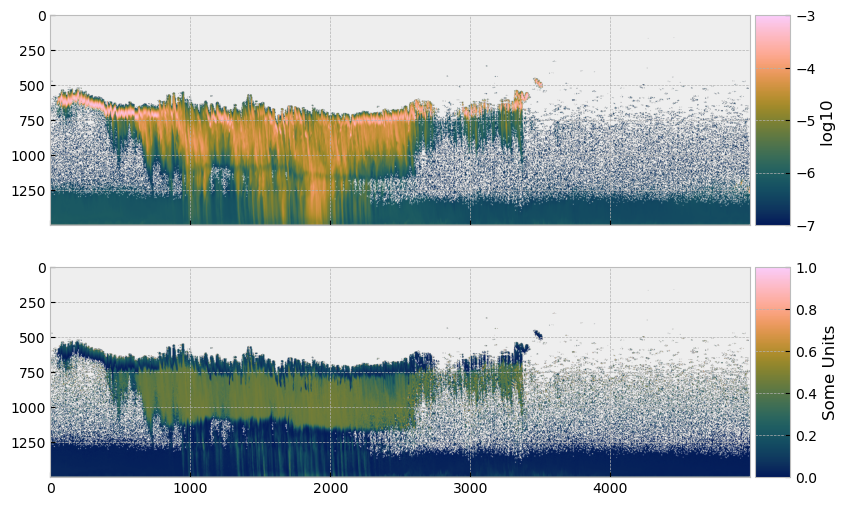

In [102]:
import datashader.transfer_functions as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.dates as mdates

height_range = slice(0,5000)

variable_names = ['beta_att_clean', 'linear_depol_ratio_clean']

# Log-transform the data
array1 = np.log10(februar.dataset[variable_names[0]]).sel(range=height_range).T
array2 = februar.dataset[variable_names[1]].sel(range=height_range).T

# Define the color map and normalization
color_map = cmc.batlow
vmin = -7
vmax = -3
array1 = xr.where((array1 >= vmin) & (array1 <= vmax), array1, np.nan)
array2 = xr.where((array2 >= 0) & (array2 <= 1), array2, np.nan)

# Create the plots
img_size = (5000, 1500)
print(img_size)
img = tf.shade(array1, how='linear', cmap=cmc.batlow).to_pil().resize(img_size)
img2 = tf.shade(array2, how='linear', cmap=cmc.batlow).to_pil().resize(img_size)

fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=True)
axs[0].imshow(img)
axs[1].imshow(img2)

# Create colorbars for the plots
norm1 = Normalize(vmin=vmin, vmax=vmax)
divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
fig.colorbar(ScalarMappable(norm=norm1, cmap=color_map), cax=cax1, label='log10 ')

# 
norm2 = Normalize(vmin=0, vmax=1)
divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
fig.colorbar(ScalarMappable(norm=norm2, cmap=color_map), cax=cax2, label='Some Units')

# Set x-axis to time 
#xticks = np.linspace(0, img_size[0]-1, num=10, endpoint=True)
xticks = axs[1].get_xticks()
idx_original = xr.DataArray((xticks[:-1]/img_size[0] * februar.dataset['time'].size).astype(int), dims=['time'])
xticks_labels = februar.dataset['time'].isel(time=idx_original).dt.strftime('%m-%d %H').values
xticks_labels = xticks_labels.append(None)
axs[1].set_xticks(xticks)
axs[1].set_xticklabels(xticks_labels,  rotation=45)

# Set x-axis to time 
yticks = axs[1].get_yticks()
idx_original = xr.DataArray((xticks[:-1]/img_size[0] * februar.dataset['time'].size).astype(int), dims=['time'])
yticks_labels = array1['range'].isel(range=idx_original_y).values.astype(int)
yticks_labels = yticks_labels.append(None)
#print(yticks_labels)
axs[1].set_yticks(yticks)
axs[1].set_yticklabels(np.flip(yticks_labels))

plt.show()

In [107]:
array1['time'].sel(0)

ValueError: the first argument to .sel must be a dictionary

In [56]:
februar.dataset

<xarray.Dataset>
Dimensions:                            (time: 1440, layer: 5, range: 3276)
Coordinates:
  * time                               (time) datetime64[ns] 2023-02-03T23:57...
  * range                              (range) float64 0.0 4.8 ... 1.572e+04
  * layer                              (layer) float64 1.0 2.0 3.0 4.0 5.0
    longitude                          float64 ...
    latitude                           float64 ...
Data variables: (12/19)
    cloud_base_heights                 (time, layer) float64 ...
    vertical_visibility                (time) float64 ...
    p_pol                              (time, range) float32 ...
    x_pol                              (time, range) float32 ...
    beta_att                           (time, range) float32 2.007e-06 ... 8....
    linear_depol_ratio                 (time, range) float32 0.1223 ... -0.1736
    ...                                 ...
    sky_condition_cloud_layer_covers   (time, layer) float32 ...
    sky_condition_cloud_layer_heights  (time, layer) float64 ...
    beta_att_clean                     (time, range) float32 nan nan ... nan nan
    linear_depol_ratio_clean           (time, range) float32 nan nan ... nan nan
    noise_mask                         (time, range) bool False False ... False
    to_interpolate_mask                (time, range) bool False False ... False
Attributes:
    title:                                         CL61D, CL61 with Depolariz...
    institution:                                   
    source:                                        CL61EERL
    conventions:                                   CF-1.8
    schema_version:                                1.2
    sw_version:                                    1.1.10
    history:                                       
    comment:                                       
    unit:                                          m
    temporal span of this file in minutes:         5.0
    time between consecutive profiles in seconds:  60

<xarray.DataArray 'time' (time: 10)>
array(['2023-02-03T23:57:10.712999936', '2023-02-04T02:36:10.905999872',
       '2023-02-04T05:16:10.880999936', '2023-02-04T07:56:11.711000064',
       '2023-02-04T10:36:10.937999872', '2023-02-04T13:16:10.908999936',
       '2023-02-04T15:56:10.812000000', '2023-02-04T18:36:10.828000000',
       '2023-02-04T21:16:10.548999936', '2023-02-04T23:56:10.969000192'],
      dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 2023-02-03T23:57:10.712999936 ... 2023-0...
    longitude  float64 ...
    latitude   float64 ...
Attributes:
    long_name:      Time
    axis:           T
    standard_name:  time
    cf_role:        profile_id


## Other way to directly plot xarray

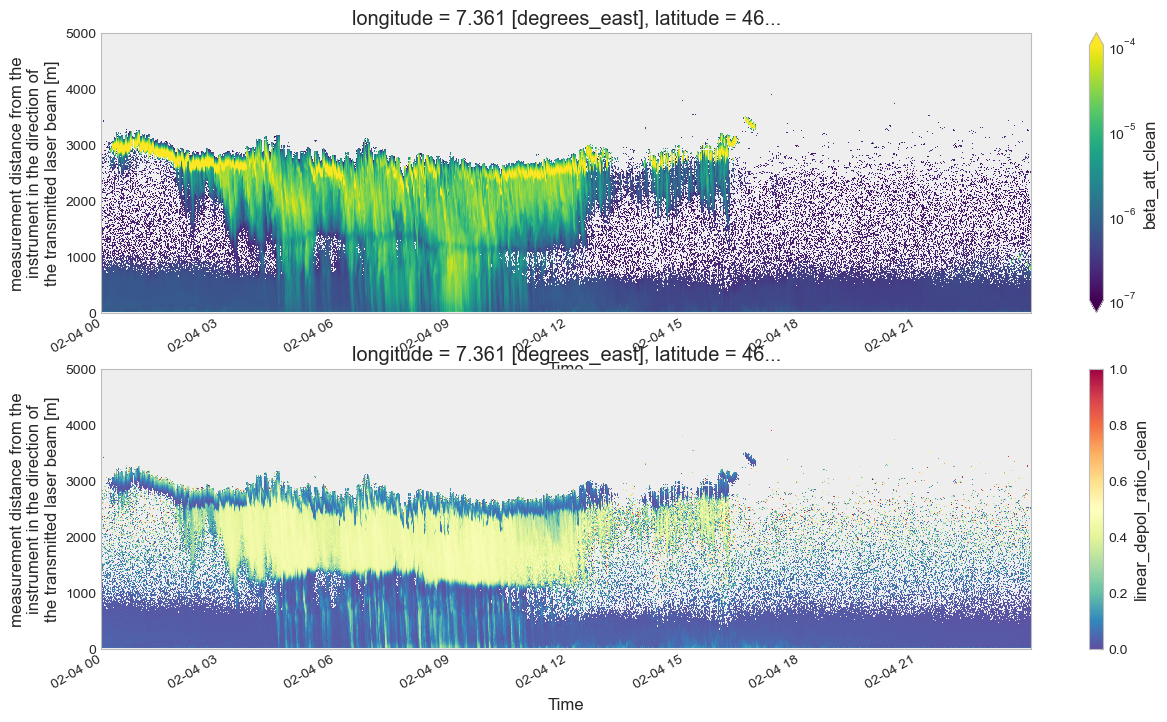

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

lims = [1e-7,1e-4]
hlims = [0,5000]
var1_arr = februar.dataset['beta_att_clean']
var2_arr = februar.dataset['linear_depol_ratio_clean']

fig, axs = plt.subplots(2,1, figsize=(15,8))

var1_arr.plot(x= 'time', y = 'range', ax = axs[0], vmin= lims[0], vmax = lims[1],
               norm=colors.LogNorm(vmin=lims[0], vmax=lims[1]), ylim = hlims)

var2_arr.plot(x = 'time', y = 'range', cmap='Spectral_r', vmin=0, vmax=1, ax=axs[1], ylim=hlims)

# Plot histograms

saved element to ..\Outputs\2023-02-03_hist2D


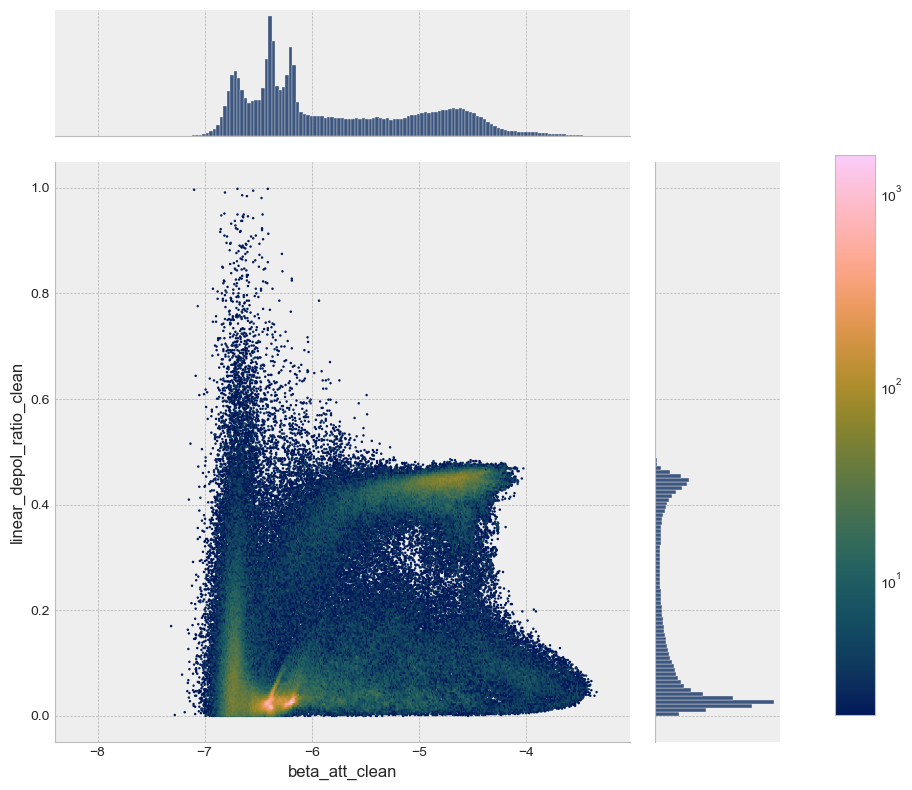

In [11]:
februar.plot.plot_histogram()

saved element to ..\Outputs\2023-06-27_hist2D


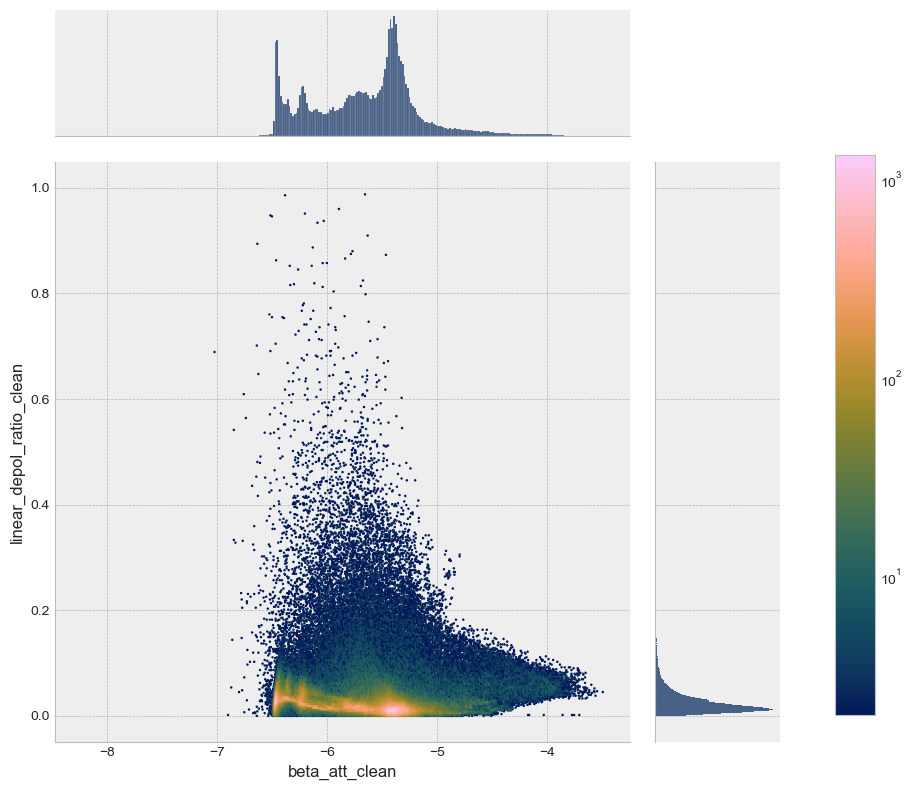

In [12]:
june.plot.plot_histogram()

# Plot profiles

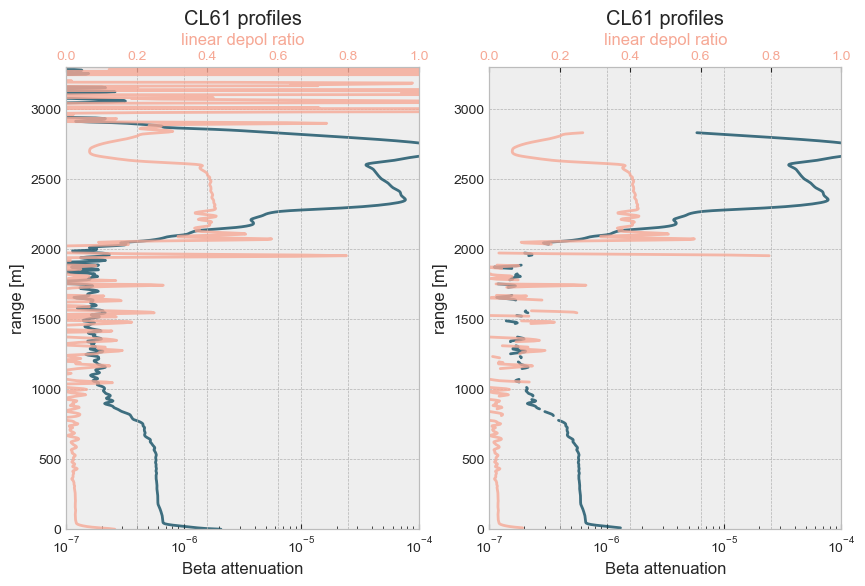

array([<Axes: xlabel='Beta attenuation', ylabel='range [m]'>,
       <Axes: xlabel='Beta attenuation', ylabel='range [m]'>],
      dtype=object)

In [13]:
februar.plot.compare_profiles(time_period='02-04-2023 03:00', comparison='variable', range_limits=[0,3300])

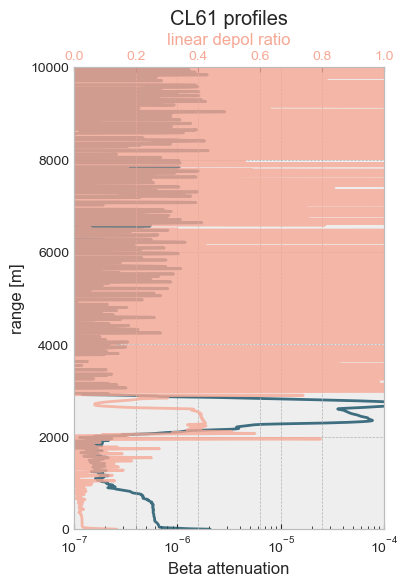

In [14]:
februar.plot.vertical_profiles(time_of_interest='02-04-2023 03:00', range_limits=[0,10000])

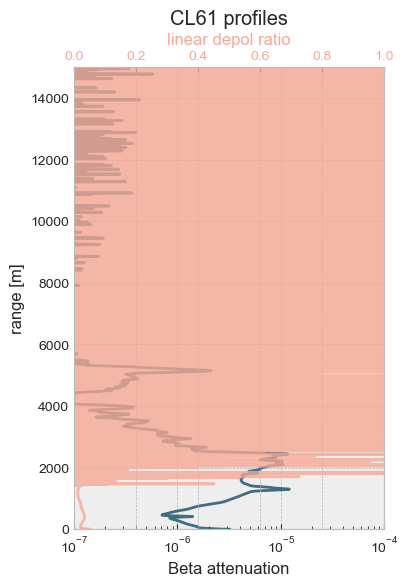

In [15]:
june.plot.vertical_profiles() #Without arguments, it takes the avg profiles

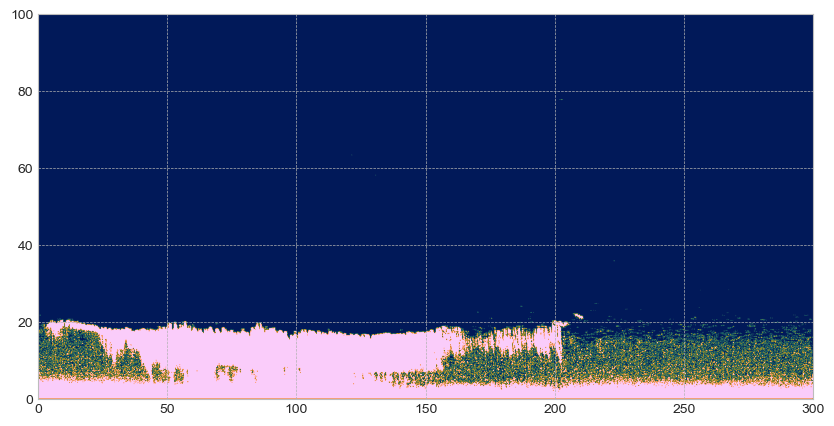

In [16]:
import datashader as ds
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Create a Datashader Canvas
cvs = ds.Canvas(plot_width=300, plot_height=100)

variable = 'beta_att_clean'
# Log-transform the data
#aa = xr.where(februar.dataset[variable]>1e-8, februar.dataset[variable], 1e-8)
#aa = xr.where(<1e-4, aa, 1e-4)
#log_back_att_arr = np.log10(februar.dataset[variable])
log_back_att_arr = februar.dataset[variable]

# Define the color map and normalization
color_map = 'cmc_batlow'
vmin = 1e-9
vmax = 1e-4

log_back_att_arr = np.clip(log_back_att_arr, vmin, vmax)
log_back_att_arr = (log_back_att_arr - vmin) / (vmax - vmin)

# Create the plot
img = tf.shade(log_back_att_arr.T, cmap=cmc.batlow)

# Truncate color values to the range [vmin, vmax] and rescale
#normalized_img = tf.interpolate(log_back_att_arr.T, cmap=cmc.batlow, how='linear', span=(vmin, vmax))

# Define the extent based on the plot_width and plot_height
extent = [0, cvs.plot_width, 0, cvs.plot_height]

# Create the figure with the desired figsize
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Show the image with the specified extent
imgplot = ax.imshow(img, extent=extent, aspect='auto', origin='lower')
imgplot.set_cmap(cmc.batlow)

# Add labels or other customizations if needed
plt.show()


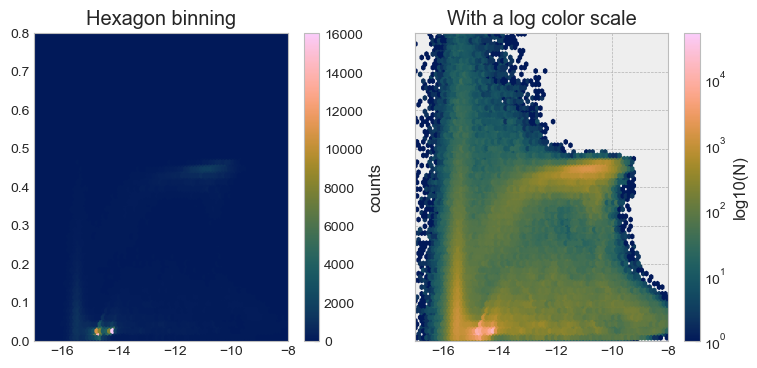

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = np.log(februar.dataset['beta_att_clean'].values.flatten())
y = februar.dataset['linear_depol_ratio_clean'].values.flatten()

fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize=(9, 4))

hb = ax0.hexbin(x, y, gridsize=100, cmap=cmc.batlow)
ax0.set(xlim=[-17, -8], ylim=[0,1])
ax0.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax0, label='counts')

hb = ax1.hexbin(x, y, gridsize=100, vmin=1, vmax=5e4, bins='log', cmap=cmc.batlow)
ax1.set(xlim=[-17, -8], ylim=[0,0.8])
ax1.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax1, label='log10(N)')

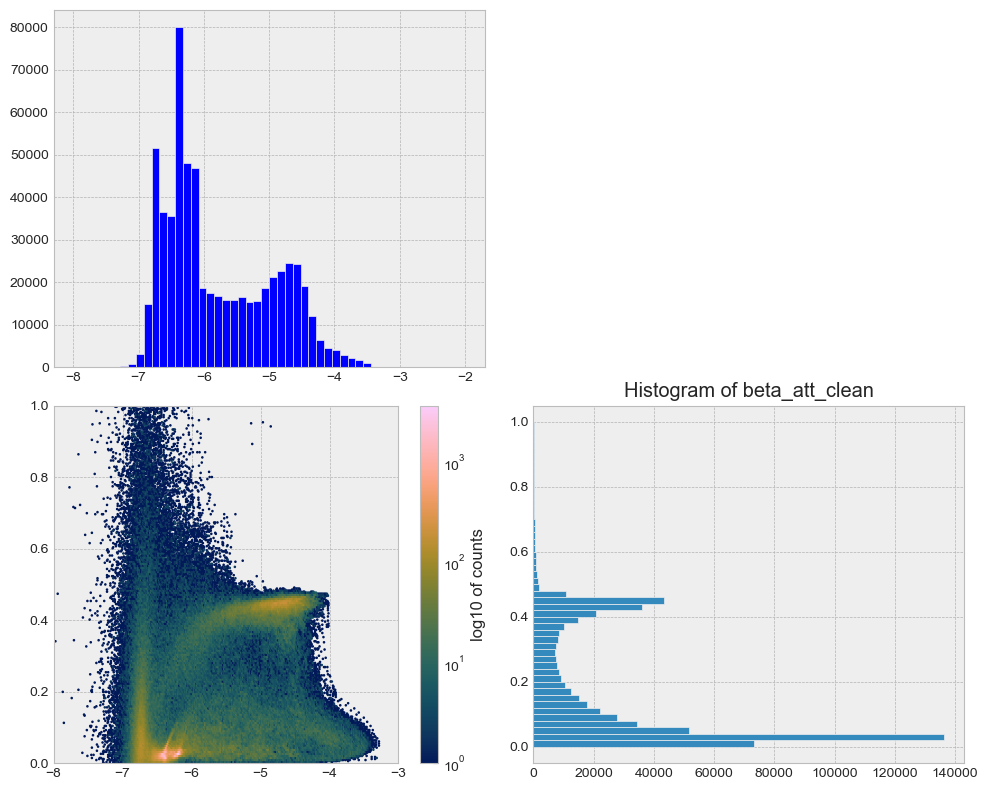

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.log10(februar.dataset['beta_att_clean'].values.flatten())
y = februar.dataset['linear_depol_ratio_clean'].values.flatten()

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#histogram of linear_depol_ratio_clean in the upper-right
ax0 = axs[0, 0]
ax0.hist(np.log10(februar.dataset['beta_att_clean'].values.flatten()),
         range = [-8, -2],
         bins=50, color='blue', log=False)

# Hexbin plot in the lower-left
ax1 = axs[1, 0]
hb = ax1.hexbin(x, y, gridsize=300, bins='log', cmap=cmc.batlow)
ax1.set(xlim=[-8, -3], ylim=[0, 1])
cb = fig.colorbar(hb, ax=ax1, label='log10 of counts')

# Histogram of beta_att_clean in the lower-right
ax2 = axs[1, 1]
#h1 = februar.dataset['beta_att_clean'].plot.hist(ax=ax2, xscale = 'log')
plt.hist(februar.dataset['linear_depol_ratio_clean'].values.flatten(),
         bins=50,
         orientation='horizontal',
         log=False)
ax2.set_title("Histogram of beta_att_clean")



# Leave the upper-left subplot empty
ax4 = axs[0, 1]
ax4.axis('off')

plt.tight_layout()
plt.show()

# Cluster and visualize

In [ ]:
februar.process.perform_kmeans_clustering(variable_as_features=['beta_att_clean', 'linear_depol_ratio_clean', 'range'],
                                          weights=[1,1, 0.3],
                                          cluster_number=8,
                                          plot_result=True,
                                          kmean_method  = 'random')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np


# Choose the base colormap (e.g., 'viridis', 'coolwarm', 'cividis', etc.)
base_cmap = cmc.batlow

# Define the number of colors in the new colormap
N = 8

# Extract a sufficient number of colors from the base colormap
base_colors = base_cmap(np.linspace(0, 1, num=N))

# Shuffle the colors randomly
np.random.shuffle(base_colors)

# Take the first N shuffled colors to create the new colormap
new_cmap = mcolors.ListedColormap(base_colors)

# Generate some example data
x = np.log(februar.dataset['beta_att_clean'].values.flatten())
y = februar.dataset['linear_depol_ratio_clean'].values.flatten()
z = februar.dataset['kmean_clusters'].values.flatten()


fig, ax = plt.subplots(1,1, figsize=(8,5))
# Create a hexbin plot
hb = plt.hexbin(x, y, C=z, cmap=new_cmap, gridsize=500, mincnt=2)

# Add a colorbar to show the mapping of z values to colors
plt.colorbar(label='Color')

# Add labels and a title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hexbin Plot withColor Mapping')

plt.show()


In [ ]:
import seaborn as sns
import pandas as pd

sns.set_theme(style="ticks")
x = np.log(februar.dataset['beta_att_clean'].values.flatten())
y = februar.dataset['linear_depol_ratio_clean'].values.flatten()
z = februar.dataset['kmean_clusters'].values.flatten()

df = pd.DataFrame({'beta': x, 'depol':y, 'class':z})

# Load the planets dataset and initialize the figure
g = sns.JointGrid(data=df, x="beta", y="depol")

# Create a scatterplot
sns.scatterplot(data=df, x="beta", y="depol", hue="class", ax=g.ax_joint)

# Add marginal histograms
sns.histplot(data=df, x="beta", ax=g.ax_marg_x)
sns.histplot(data=df, y="depol", ax=g.ax_marg_y, color="g")


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme(style="ticks")

x = np.log(februar.dataset['beta_att_clean'].values.flatten())
y = februar.dataset['linear_depol_ratio_clean'].values.flatten()
z = februar.dataset['kmean_clusters'].values.flatten()

df = pd.DataFrame({'beta': x, 'depol':y, 'class':z})

sns.displot(data=df, x='beta', y='depol', hue='class')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.gridspec as gridspec


# Generate some example data
x = np.log(februar.dataset['beta_att_clean'].values.flatten())
y = februar.dataset['linear_depol_ratio_clean'].values.flatten()
z = februar.dataset['kmean_clusters'].values.flatten()
df = pd.DataFrame({'beta': x, 'depol':y, 'class':z})


# Create a hexbin plot
g = sns.JointGrid(data=df, x="beta", y="depol")

hb = g.ax_joint.hexbin(x, y, C=z, gridsize=500, cmap=new_cmap, mincnt=2)

# Add a colorbar to show the mapping of z values to colors
cbar = plt.colorbar(hb, ax=g.ax_joint)
cbar.set_label('Color')


# Create marginal histograms using Seaborn
sns.histplot(data=df, x="beta", ax=g.ax_marg_x, color='b')
sns.histplot(data=df, y="depol", ax=g.ax_marg_y, color='b', orientation='horizontal')


## Tests to vizualize as 3D histogram contour layers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, ticker
# Your data
x = np.log(februar_cl61.dataset['beta_att_clean'].values.flatten())
y = februar_cl61.dataset['linear_depol_ratio_clean'].values.flatten()
range_array = np.repeat(februar_cl61.dataset['range'], y.size // len(februar_cl61.dataset['range']))
points_all = np.vstack((x, y, range_array)).T
points = points_all[~np.isnan(points_all).any(axis=1), :]

heights = np.logspace(2,4, num=5)
#heights = [500, 1000, 2000, 3000, 6000]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

last_h = 0
for i, h in enumerate(heights):
        
    condition = (points[:, 2] > max((0,heights[i]-500))) & (points[:, 2] < min(heights[i]+500, 1500))
    selected_points = points[condition]

    # Create a 2D histogram of your data
    H, xedges, yedges = np.histogram2d(selected_points[:,0], selected_points[:,1], bins=(10, 10))  # You can adjust the number of bins (e.g., 100x100)

    X, Y = np.meshgrid(xedges[:-1],yedges[:-1])

    # Plot the contour lines
    cs = ax.contourf(X, Y, H, 
                    zdir='z', 
                    offset=np.log10(heights[i]),
                    levels = 100,
                    cmap='cmc.batlow', 
                    alpha=0.5)
    #cs = ax.hexbin(selected_points[:,0], selected_points[:,1]
    #            , gridsize=50, bins='log', cmap='inferno', zdir = 'z', offset = heights[1])

#plt.zscale('log')
ax.set_xlim(-18, -10)
#ax1.set_ylim(-3, 3)
ax.set_zlim(1.5, 3.5)
plt.colorbar(cs)
plt.show()